In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [17]:
data = pd.read_csv("../datasets/iris_dataset/iris.data")
feature_column = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
data.columns = [*feature_column, "class"]
sample =data.sample(5)
sample

,sepal_length,sepal_width,petal_length,petal_width,class
70,6.1,2.8,4.0,1.3,Iris-versicolor
51,6.9,3.1,4.9,1.5,Iris-versicolor
16,5.1,3.5,1.4,0.3,Iris-setosa
80,5.5,2.4,3.7,1.0,Iris-versicolor
13,5.8,4.0,1.2,0.2,Iris-setosa


In [18]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


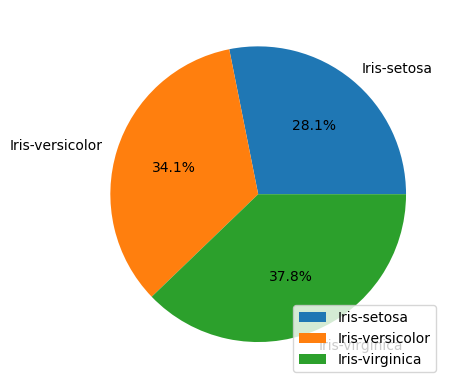

In [19]:
plt.pie(data.groupby(['class']).sum()["sepal_length"], labels=data.groupby(['class']).sum()["sepal_length"].index, autopct='%1.1f%%')
plt.legend(loc="lower right")


In [20]:
feature_data = data[feature_column]
feature_data

,sepal_length,sepal_width,petal_length,petal_width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4
...,...,...,...,...
144,6.7,3.0,5.2,2.3
145,6.3,2.5,5.0,1.9
146,6.5,3.0,5.2,2.0
147,6.2,3.4,5.4,2.3


In [21]:
var = feature_data.var()
var

sepal_length    0.686568
sepal_width     0.187921
petal_length    3.096372
petal_width     0.579566
dtype: float64

In [22]:
cov_matrix = feature_data.cov()
cov_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.686568,-0.037279,1.270362,0.515347
sepal_width,-0.037279,0.187921,-0.316731,-0.115749
petal_length,1.270362,-0.316731,3.096372,1.289124
petal_width,0.515347,-0.115749,1.289124,0.579566


In [23]:
cov_matrix.to_csv("cov.csv")

<Axes: >

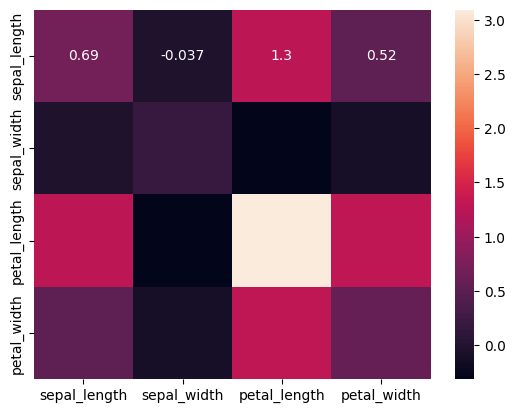

In [24]:
sns.heatmap(cov_matrix, annot=True)

In [25]:
corr_matrix = feature_data.corr()
corr_matrix
corr_matrix.to_csv("corr.csv")

<Axes: >

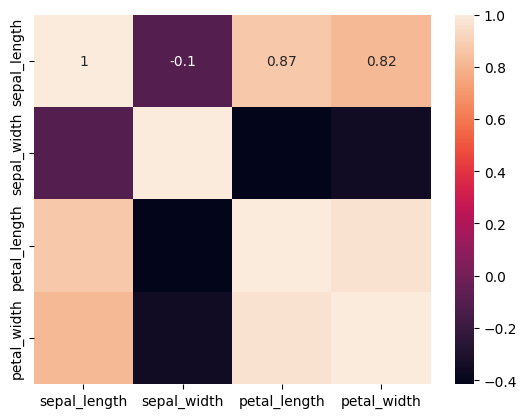

In [26]:
sns.heatmap(corr_matrix, annot=True)

In [27]:
class PCA:
  def __init__(self, data: pd.DataFrame, classes = pd.Series) -> None:
    self.__data = data
    self.__classes = classes  
    self.__eigval: np.ndarray = None
    self.__eigvec: np.ndarray = None
    self.__x_adj: pd.DataFrame = None
    self.__cov_adj: pd.DataFrame = None
    self.__sort_idx: np.ndarray = None
    self.__cal_pca()

  def __cal_pca(self):
    self.__x_adj = (self.__data - self.__data.mean()) 
    self.__cov_adj = self.__x_adj.cov()
    self.__eigval, self.__eigvec = np.linalg.eig(self.__cov_adj)
    self.__sort_idx = np.argsort(self.__eigval)[::-1]
    self.__eigvec = self.__eigvec.T

  def eigvec(self, n: int = None) -> np.ndarray:
    if n == None:
      return self.__eigvec
    
    return self.__eigvec[self.__sort_idx[:n]]
  
  def eigval(self, n: int = None) -> np.ndarray:
    if n == None:
      return self.__eigval

    return self.__eigval[self.__sort_idx[:n]]
  
  def project(self, n: int) -> pd.DataFrame:
    max_eigvec = self.eigvec(n)
    new_x = max_eigvec.dot(self.__x_adj.T).T
    new_x = pd.DataFrame(new_x)
    new_x.columns = [f"PC{i+1}" for i in range(n)]
    new_x["class"] = self.__classes
    return new_x
  
  def per_var_of(self, n: int) -> float:
    return self.eigval(n).sum() / self.eigval().sum()
  
  def eig_var(self) -> list[float]:
    sum_val = self.__eigval.sum()
    return [ e / sum_val for e in self.__eigval]

In [28]:
def add_class(data: pd.DataFrame, classes: pd.Series) -> pd.DataFrame:
  with_class = data.copy()
  with_class["class"] = classes
  return with_class

In [29]:
def plot_pca(data: pd.DataFrame, axises: list[str], labels=list, pointsize: int = 0.7, viewbox: list = None) -> None:
  p = None
  if len(axises) == 3:
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection ="3d")
    if viewbox:
      ax.view_init(elev=viewbox[0], azim=viewbox[1], roll=viewbox[2])
    for l in labels:
      sc = data[data["class"] == l]
      ax.scatter3D(*[sc[axis] for axis in axises], s=pointsize,)
      ax.set_xlabel(axises[0])
      ax.set_ylabel(axises[1])
      ax.set_zlabel(axises[2])
  else:
    for l in labels:
      sc = data[data["class"] == l]
      plt.scatter(*[sc[axis] for axis in axises], s=pointsize,)
    plt.xlabel(axises[0])
    plt.ylabel(axises[1])
  plt.legend(labels)
  plt.show()

In [30]:
pca = PCA(feature_data, data["class"])

In [31]:
pca.per_var_of(2)

0.9773879874667986

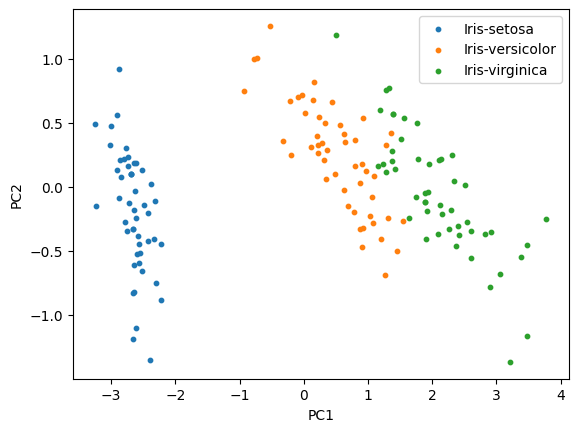

In [32]:
plot_pca(pca.project(2), ["PC1","PC2"], data["class"].unique(), pointsize=10)

In [33]:
print(pca.eigval())

[4.20438706 0.24314579 0.07905128 0.02384304]


In [34]:
pca.per_var_of(3)

0.9947602632265022

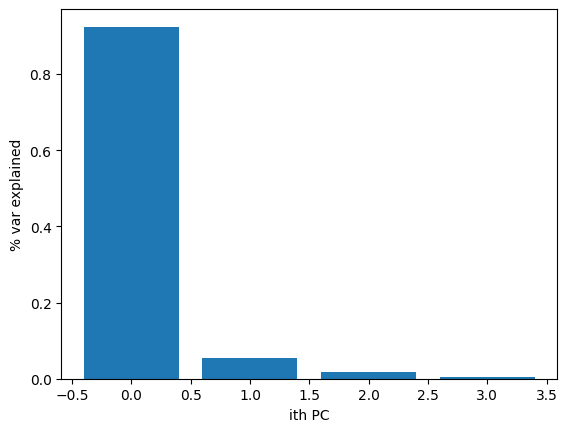

In [35]:
vars = pca.eig_var()
plt.bar(range(len(vars)), vars)
plt.xlabel("ith PC")
plt.ylabel("% var explained")
plt.show()

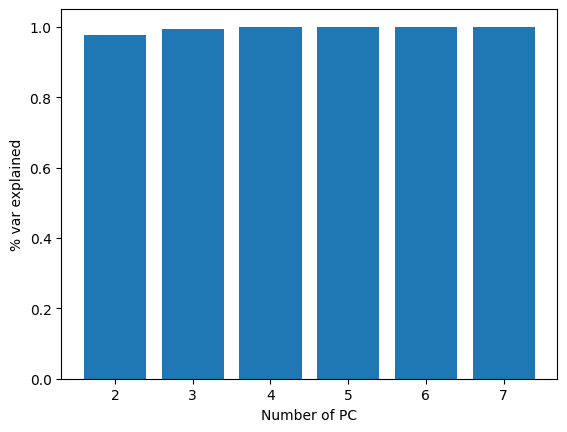

In [36]:
vars = []
for i in range(2, 7+1):
  vars.append(pca.per_var_of(i))
plt.bar(range(2, 7+1), vars)
plt.xlabel("Number of PC")
plt.ylabel("% var explained")
plt.show()

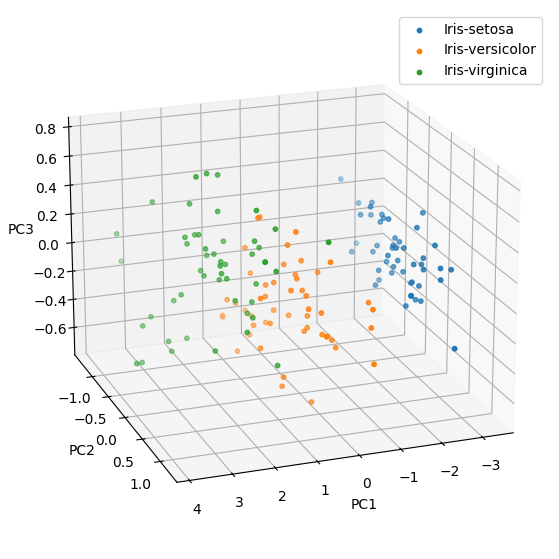

In [37]:
plot_pca(pca.project(3), ["PC1", "PC2", "PC3"], data["class"].unique(), viewbox=[20, 70, 0], pointsize=10)